In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.signal import find_peaks
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from FeatureStatCalulateFile import FeatureStat
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [2]:
# Preview of the Data: 
# Reading the data into a pandas data frame with defined column names and dropping null values will allow us to achive the processing above
# Define column names
column_names = ['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']
# Read the file, skipping bad lines
data = pd.read_csv('data/WISDM_ar_v1.1_raw.txt', sep=',', names=column_names, on_bad_lines='skip')
# drop null values: 
data = data.dropna()

data['z-axis'] = data['z-axis'].str.rstrip(';').astype(float)

In [4]:
# Split the data : 
dataTrain = data[data['user'] <= 27]
dataTest = data[data['user'] > 27]

In [5]:
# create window sizes: 

def get_windows(df, window_size, step_size):

    x_list = []
    y_list = []
    z_list = []
    activity_list = []
    for i in range(0, df.shape[0] - window_size, step_size):
        xs = df['x-axis'].values[i : i + window_size]
        ys = df['y-axis'].values[i : i + window_size]
        zs = df['z-axis'].values[i : i + window_size]
        label = df['activity'][i : i + window_size].mode()[0]

        x_list.append(xs)
        y_list.append(ys)
        z_list.append(zs)
        activity_list.append(label)
    return x_list, y_list, z_list, activity_list

In [6]:
# Extract Windows

x_list, y_list, z_list, activity_list = get_windows(dataTrain, 100, 50)

tx_list, ty_list, tz_list, tactivity_list = get_windows(dataTest, 100, 50)

In [7]:
len(x_list), len(tx_list)

(16032, 5694)

In [9]:
y_train = np.array(activity_list)
y_test = np.array(tactivity_list)

In [12]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()
featuredData = FeatureStat(X_train, x_list, y_list, z_list)
test_featuredData = FeatureStat(X_test, tx_list, ty_list, tz_list)
X_train = featuredData.all()
X_test = test_featuredData.all()

In [13]:
X_train.shape, X_test.shape

((16032, 59), (5694, 59))

In [14]:
y_train, y_test

(array(['Walking', 'Walking', 'Walking', ..., 'Sitting', 'Sitting',
        'Sitting'], dtype='<U10'),
 array(['Jogging', 'Jogging', 'Jogging', ..., 'Standing', 'Standing',
        'Standing'], dtype='<U10'))

In [15]:
# Scaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [23]:
# Decision Tree
decisionTree = DecisionTreeClassifier(random_state=21)
decisionTree.fit(X_train, y_train)
dT_pred = decisionTree.predict(X_test)
dt_accuracy = accuracy_score(y_true=y_test, y_pred=dT_pred)
print(f'Accuracy of Decision Tree on unbalanced WISDM data is {dt_accuracy*100:.2f}')
print("\n------------------ Decision Tree Classification Report - unbalanced WISDM data -------------------\n")
print(classification_report(y_test, dT_pred))

Accuracy of Decision Tree on unbalanced WISDM data is 75.83

------------------ Decision Tree Classification Report - unbalanced WISDM data -------------------

              precision    recall  f1-score   support

  Downstairs       0.42      0.48      0.45       582
     Jogging       0.86      0.94      0.90      1588
     Sitting       0.90      0.98      0.94       362
    Standing       0.99      0.86      0.92       323
    Upstairs       0.48      0.59      0.53       638
     Walking       0.83      0.70      0.76      2201

    accuracy                           0.76      5694
   macro avg       0.75      0.76      0.75      5694
weighted avg       0.77      0.76      0.76      5694



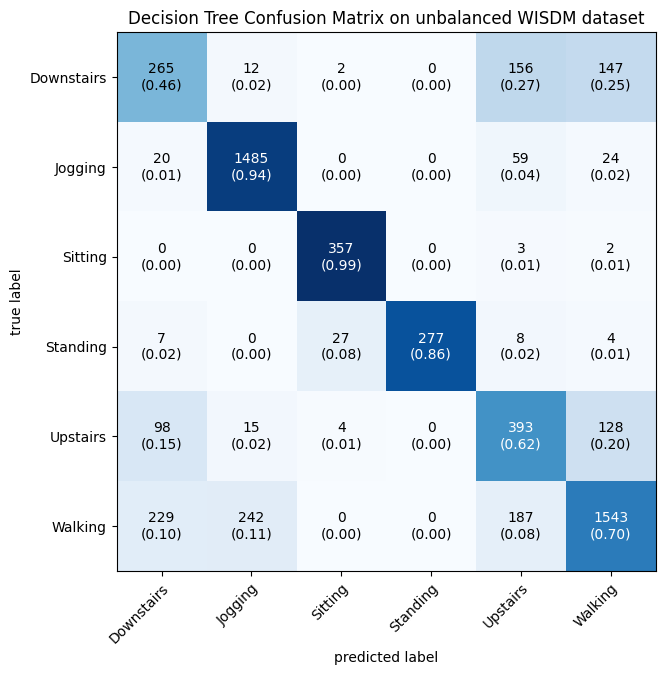

In [21]:
dT_cm = confusion_matrix(y_test, dT_pred)
plot_confusion_matrix(dT_cm, class_names=decisionTree.classes_, show_normed=True, figsize=(7,7))
plt.title("Decision Tree Confusion Matrix on unbalanced WISDM dataset")
plt.show()

In [30]:
# Random Forest
randomForest = RandomForestClassifier(random_state=21)
randomForest.fit(X_train, y_train)
rF_pred = randomForest.predict(X_test)
rF_accuracy = accuracy_score(y_true=y_test, y_pred=rF_pred)
print(f'Accuracy of Random Forest on unbalanced WISDM data is {rF_accuracy*100:.2f}')
print(classification_report(y_test, rF_pred))


Accuracy of Random Forest on unbalanced WISDM data is 80.63
              precision    recall  f1-score   support

  Downstairs       0.65      0.58      0.62       582
     Jogging       0.80      0.95      0.87      1588
     Sitting       0.96      0.92      0.94       362
    Standing       0.93      0.92      0.93       323
    Upstairs       0.66      0.61      0.63       638
     Walking       0.85      0.78      0.81      2201

    accuracy                           0.81      5694
   macro avg       0.81      0.79      0.80      5694
weighted avg       0.81      0.81      0.80      5694

